## Análisis de datos - Flinders

### Librerías

In [1]:
# Librerías comunes
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, os

# Librería para calcular la moda
from statistics import mode

### Carga de datos

In [2]:
path = 'https://github.com/charliebrown007/Datasets/blob/main/'
file = 'Flinders_converted.csv'

f = lambda x: 'No' not in x and 'TOTAL' not in x

df = pd.read_csv(filepath_or_buffer = os.path.join(path,file + '?raw=true'), sep = ';', usecols = f)

### Etapa 1: Formulación del problema general

Existe un conjunto de datos con nombre “df” y cuyos registros guardan los ciclos de evaluación de varios individuos referente a una prueba ADMQ. En tal sentido, el problema se formula de la siguiente manera:
¿Qué características tienen las respuestas registradas en el dataset y cuál es su relación con otras variables?

In [3]:
df.head()

,edad,sexo,v1,v2,v3,v4,v5,v6,v7,v8,...,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31
0,21.0,1.0,2.0,2.0,4.0,2.0,1.0,2.0,3.0,2.0,...,2.0,3.0,4.0,3.0,3.0,3.0,2.0,3.0,3.0,4.0
1,23.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,2.0,1.0,2.0,2.0,2.0,1.0,4.0,2.0,1.0,1.0
2,20.0,1.0,2.0,1.0,4.0,2.0,2.0,3.0,3.0,1.0,...,3.0,1.0,4.0,3.0,3.0,2.0,2.0,3.0,4.0,3.0
3,21.0,1.0,2.0,3.0,1.0,2.0,1.0,2.0,1.0,1.0,...,1.0,1.0,4.0,2.0,4.0,1.0,3.0,2.0,1.0,1.0
4,21.0,1.0,2.0,3.0,3.0,3.0,1.0,2.0,4.0,2.0,...,2.0,3.0,4.0,3.0,4.0,2.0,2.0,3.0,2.0,2.0


### Etapa 2: Generalidades de la base de datos

No fue necesario realizar ningún proceso de extracción, transformación y carga adicional porque todos los datos están consolidados en un archivo.

Cada registro representa a **una respuesta de cada individuo según las variables del dataset en un escala del 0 al 5**. Se dispone de 34 variables y 205 registros sin elmentos vacíos.

In [4]:
df.shape

(205, 33)

In [5]:
df.isna().sum().sum()

0

In [6]:
df.isnull().values.any()

False

### Etapa 3: Identificación de tipos de variables

Existen 33 variables. La primera es la asignación de un número correlativo sobre los registros disponibles en la base de datos, las dos siguientes son variables categóricas o factores relativas a la edad y sexo. Las variables restantes manifiestan, en una escala del 1 al 5, las respuestas a cada pregunta que componen la prueba de Flinders.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   edad    205 non-null    float64
 1   sexo    205 non-null    float64
 2   v1      205 non-null    float64
 3   v2      205 non-null    float64
 4   v3      205 non-null    float64
 5   v4      205 non-null    float64
 6   v5      205 non-null    float64
 7   v6      205 non-null    float64
 8   v7      205 non-null    float64
 9   v8      205 non-null    float64
 10  v9      205 non-null    float64
 11  v10     205 non-null    float64
 12  v11     205 non-null    float64
 13  v12     205 non-null    float64
 14  v13     205 non-null    float64
 15  v14     205 non-null    float64
 16  v15     205 non-null    float64
 17  v16     205 non-null    float64
 18  v17     205 non-null    float64
 19  v18     205 non-null    float64
 20  v19     205 non-null    float64
 21  v20     205 non-null    float64
 22  v2

### Etapa 4: Transformaciones

Podemos usar las columnas que fueron calculadas al momento de cargar el dataset si confiamos en la claidad de los resultados, si este no fuera el caso, es mejor hacer los cálculos durante las transformaciones

In [8]:
# 1. trasformación de variables

df_columns_list = [i for i in df.columns if 'v' in i]
df[df_columns_list] = df[df_columns_list].astype('int')
df = df.astype({'sexo': 'category', 'edad': int})
#df = df.astype({'sexo': 'string', 'edad': int})


# 2. Puntuación total obtenida para cada registro
df['Total'] = df.loc[:,'v1':'v31'].sum(axis = 1)


# 3. Remoción de filas cuya edad es igual a 0
df = df.loc[df['edad'] > 0]

# Verificación
#df.info()

In [9]:
df.head()

,edad,sexo,v1,v2,v3,v4,v5,v6,v7,v8,...,v23,v24,v25,v26,v27,v28,v29,v30,v31,Total
0,21,1.0,2,2,4,2,1,2,3,2,...,3,4,3,3,3,2,3,3,4,80
1,23,1.0,2,2,2,1,1,1,1,1,...,1,2,2,2,1,4,2,1,1,50
2,20,1.0,2,1,4,2,2,3,3,1,...,1,4,3,3,2,2,3,4,3,79
3,21,1.0,2,3,1,2,1,2,1,1,...,1,4,2,4,1,3,2,1,1,62
4,21,1.0,2,3,3,3,1,2,4,2,...,3,4,3,4,2,2,3,2,2,83


### Etapa 5: Análisis general

#### Estadísticas generales para variables cuantitativas

In [10]:
# Aislamiento de variables cuantitativas
df_cuant = df.drop(labels = ['sexo'], axis = 1)

# Creamos un diccionario de funciones
stat_functions = {'Mean':'np.mean',
                  'Median':'np.median',
                  'Count':'lambda x: x.count()',
                  'DF_size':'len',
                  'NA Count':'lambda x: x.isna().sum()',
                  'Max':'max',
                  'Min':'min',
                  'Range':'lambda x : max(x) - min(x)',
                  'Std':'np.std', # Desviación estándar poblacional
                  'CV':'lambda x: ((np.std(x, ddof = 0)) / (np.mean(x)))'}

# Dentro de una estructura "for" se construirá la tabla usando el diccionario de funciones 
df_stats = pd.DataFrame()
for i in stat_functions:
    aux = df_cuant.apply(func = eval(stat_functions.get(i)), axis = 0)
    df_stats = pd.concat(objs = [df_stats, aux], axis = 1)
    
df_stats.columns = list(stat_functions.keys())
df_stats = df_stats.reset_index().rename(columns = {'index': 'Variable'})
df_stats.head()

,Variable,Mean,Median,Count,DF_size,NA Count,Max,Min,Range,Std,CV
0,edad,25.921569,24.0,204,204,0,58,16,42,6.913593,0.266712
1,v1,2.205882,2.0,204,204,0,4,1,3,0.690811,0.313168
2,v2,2.044118,2.0,204,204,0,4,0,4,0.722885,0.353642
3,v3,3.196078,3.0,204,204,0,4,0,4,0.828881,0.259343
4,v4,1.877451,2.0,204,204,0,4,1,3,0.896443,0.477479


Distribución de la edad

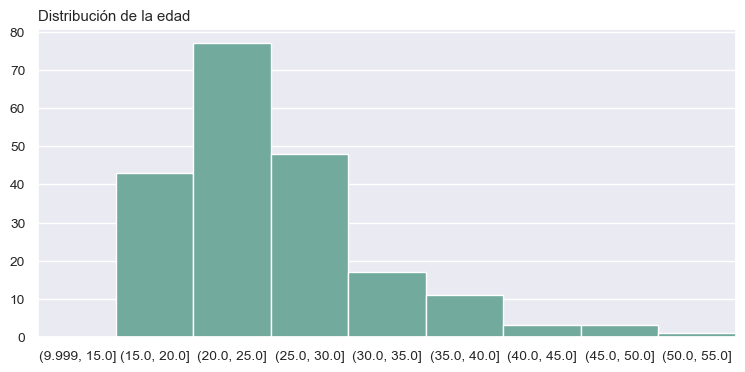

In [24]:
# Construcción de la tabla
#selected_bins = range(10,60,5)
selected_bins = np.arange(10,60,5)
plot_table = df['edad'].value_counts(bins = selected_bins, sort = False).reset_index()

# Gráfico de barras

sns.set_theme(style = "darkgrid",font_scale = 0.9)

fig, ax = plt.subplots(figsize=(9, 4))

(sns.barplot(data = plot_table, x = 'index', y = 'edad',
            estimator = sum, color='#69b3a2', width = 1, ax = ax).set(xlabel = '', ylabel = ''))

plt.title(label = 'Distribución de la edad', loc = 'left');

In [49]:
# El método cut ayuda a elimianar los decimales dle primer número
selected_bins = np.arange(10,60,10)
out = pd.cut(x = df['edad'], bins=selected_bins, include_lowest = True, right = False)
out.value_counts().sort_index()

[10, 20)     23
[20, 30)    137
[30, 40)     33
[40, 50)      9
Name: edad, dtype: int64

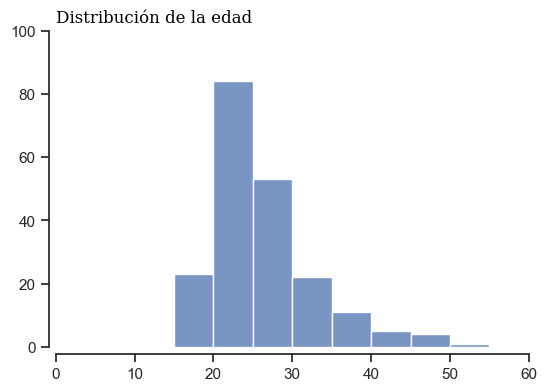

In [99]:
# set plot style: grey grid in the background:
sns.set(style = "ticks")

# displot
selected_bins = range(10,60,5)
sns.displot(data = df, x = 'edad', bins = selected_bins, edgecolor = None, kde = False,
            aspect = 1.4, height = 4).set(xlabel = '', ylabel = '');

font = {'family': 'serif', # Se puede colocar el nombre de la fuente
        'color':  'black',
        'weight': 'normal',
        'size': 12}

plt.ylim(0,100)
plt.xlim(0,60)

plt.title(label = 'Distribución de la edad', fontdict = font, loc = 'left')
sns.despine(offset = 5, trim = True, bottom = False)

#### Estadísticas generales para variables cualitativas

In [11]:
# Aislamiento de variables cuantitativas
df['sexo'].value_counts(dropna = False)

2.0    117
1.0     87
Name: sexo, dtype: int64

Gráfico para la variable 'sexo'

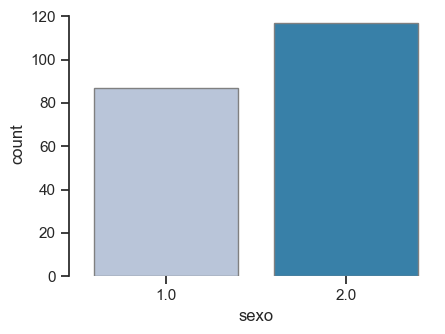

In [91]:
# set plot style: grey grid in the background:
sns.set(style = "ticks")

# catplot (en este caso de trata de una variable categórica)
sns.catplot(data = df, x = 'sexo', edgecolor = 'gray', kind = 'count', aspect = 1.3, height = 3.5, palette = "PuBu")
sns.despine(offset = 5, trim = True, bottom = True)

#### Correlación entre variables

In [190]:
df.head()

,edad,sexo,v1,v2,v3,v4,v5,v6,v7,v8,...,v23,v24,v25,v26,v27,v28,v29,v30,v31,Total
0,21,1.0,2,2,4,2,1,2,3,2,...,3,4,3,3,3,2,3,3,4,80
1,23,1.0,2,2,2,1,1,1,1,1,...,1,2,2,2,1,4,2,1,1,50
2,20,1.0,2,1,4,2,2,3,3,1,...,1,4,3,3,2,2,3,4,3,79
3,21,1.0,2,3,1,2,1,2,1,1,...,1,4,2,4,1,3,2,1,1,62
4,21,1.0,2,3,3,3,1,2,4,2,...,3,4,3,4,2,2,3,2,2,83


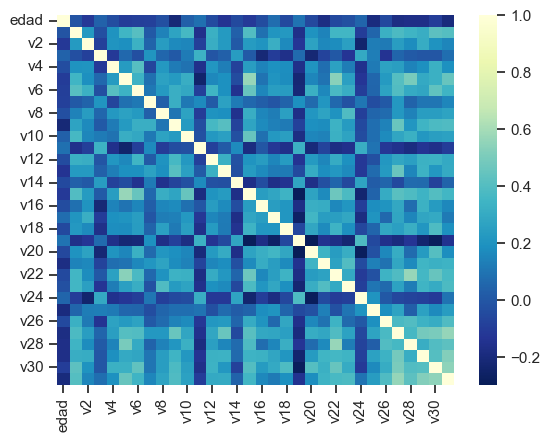

In [106]:
plt = sns.heatmap(matrix, annot = False, cmap = 'YlGnBu_r')

In [169]:
matrix = df.drop(labels = ['Total'], axis = 1).corr(method = 'pearson', numeric_only = True)
# Mejores correlaciones respecto a una variable
# matrix['edad'].sort_values(ascending = True).head(10)

# Mejores correlaciones en general
matrix_2 = (matrix.
            reset_index().rename(columns={'index': 'variable_1'}).
            melt(id_vars = ['variable_1'], var_name = 'variable_2'))

matrix_2['Same_col'] = np.where(matrix_2['variable_1'] == matrix_2['variable_2'], True, False)

matrix_2 = (matrix_2.loc[~matrix_2['Same_col']].
            drop(labels = ['Same_col'], axis = 1).
            sort_values(by = ['value'], ascending = False).
            drop_duplicates(subset = 'value', keep = 'first', ignore_index = True))
 
matrix_2.head(10)

,variable_1,variable_2,value
0,v28,v22,0.569301
1,v15,v5,0.566677
2,v31,v27,0.562900
3,v30,v31,0.547902
4,v5,v22,0.539037
5,v31,v29,0.519875
6,v27,v30,0.502408
7,v5,v28,0.496137
8,v27,v29,0.486183
9,v22,v15,0.465719


Crear un gráfico con las mejores variables

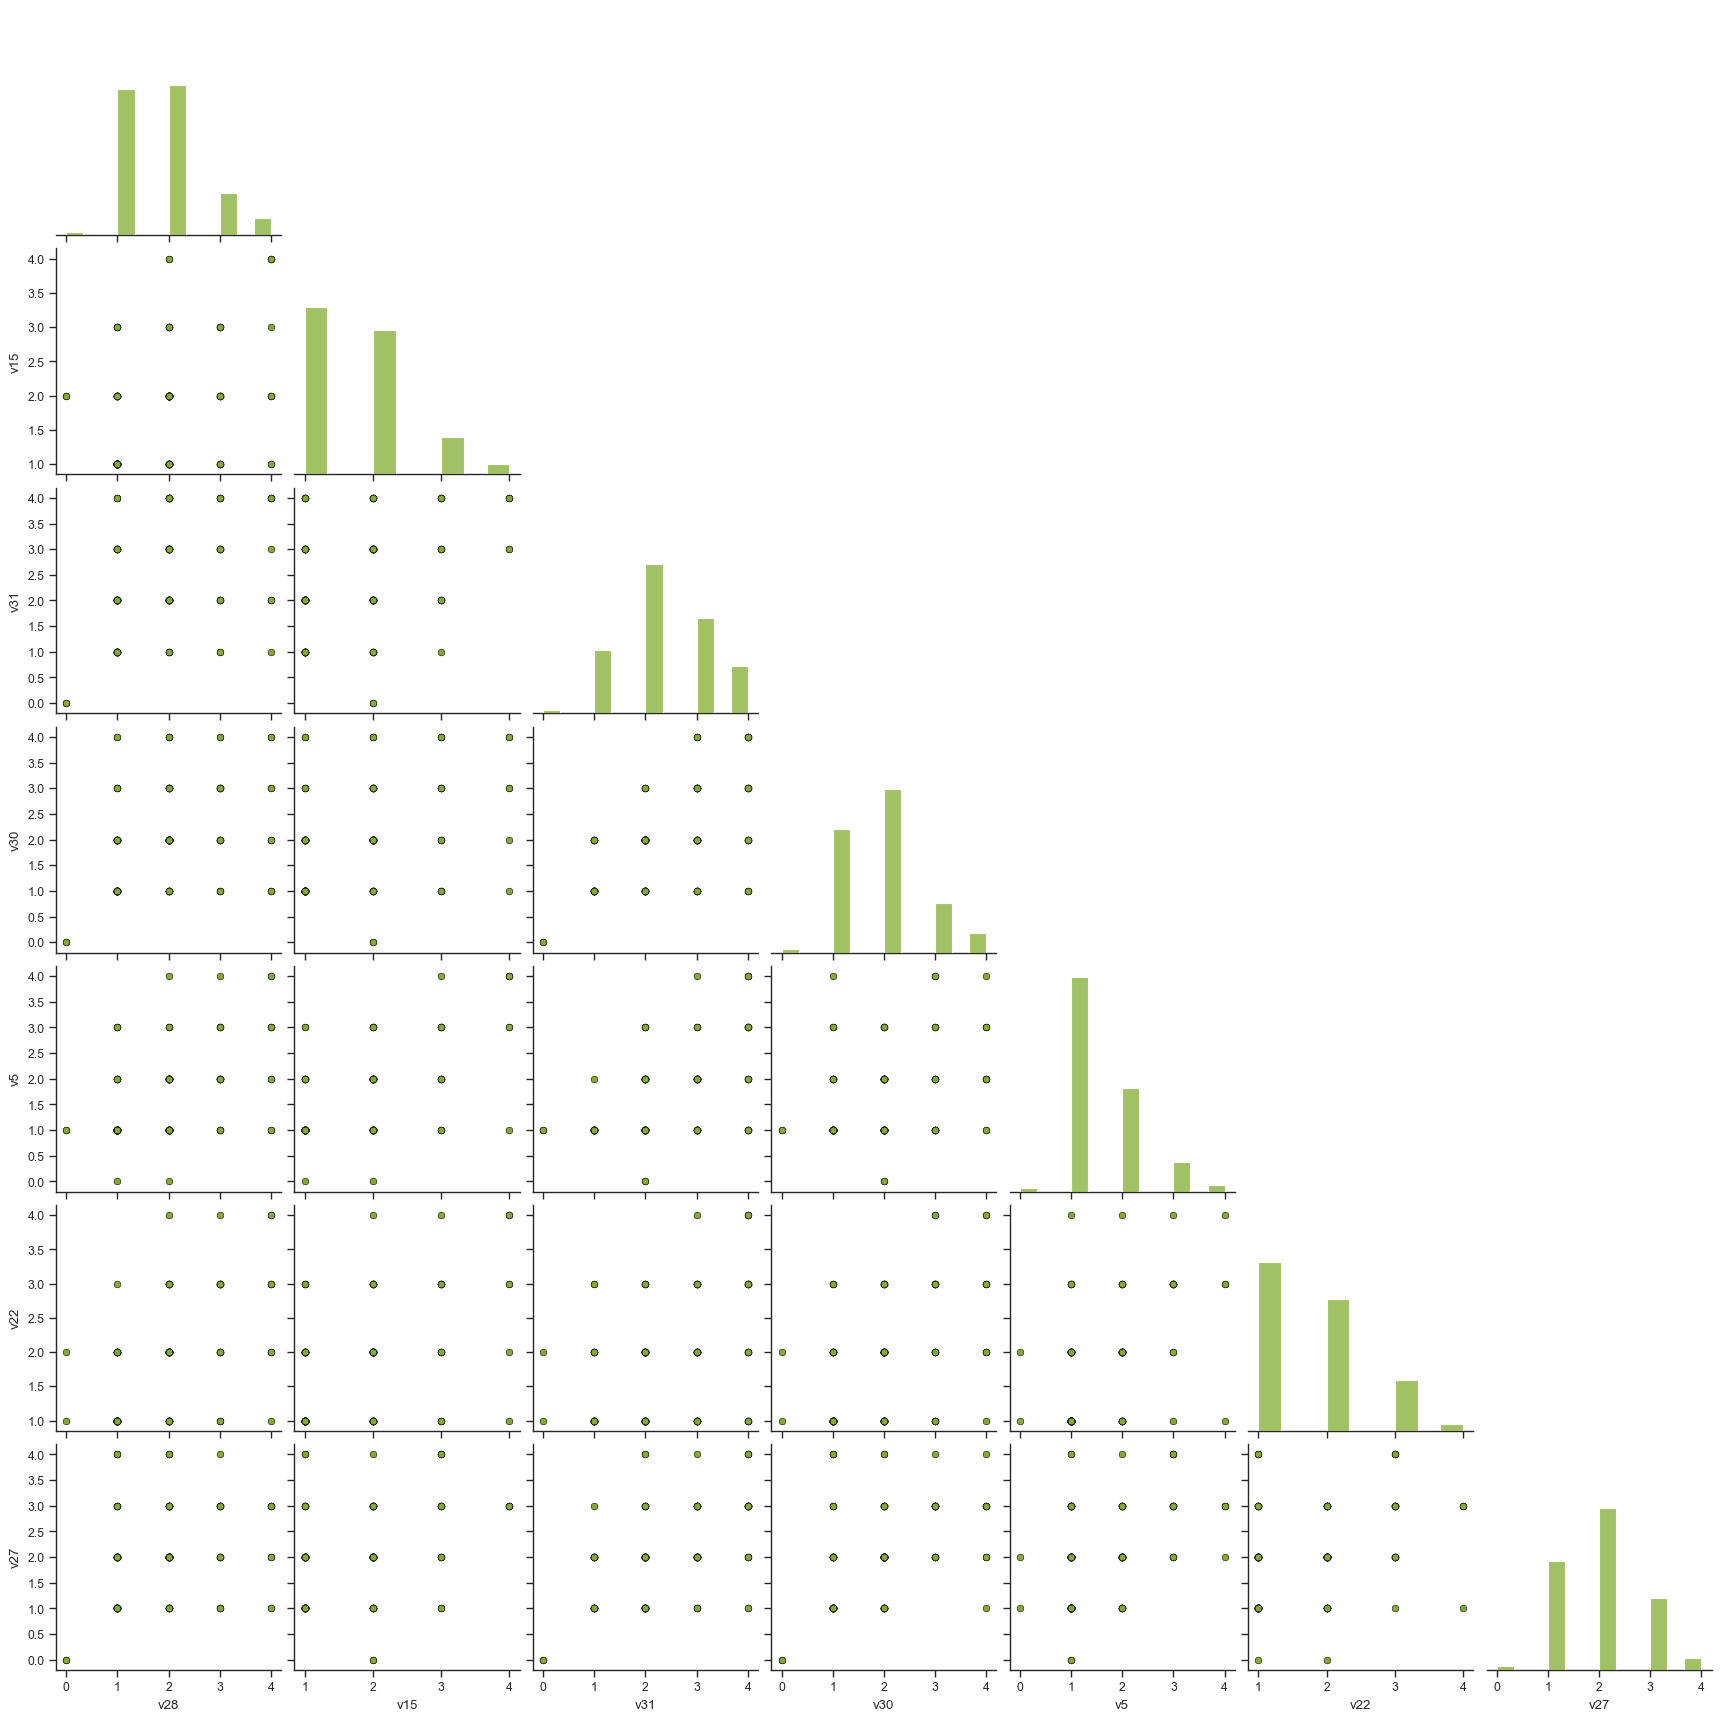

In [191]:
# Mejores variables
matrix_3 = (pd.concat([matrix_2.head()['variable_1'],matrix_2.head()['variable_2']],ignore_index = True).
            unique().
            tolist())
# Estilo del gráfico
sns.set_theme(context = 'paper', style = 'ticks')

# Gráifco
sns.pairplot(data = df[matrix_3], height = 2.5,
             plot_kws = {'color':'#82ad32','edgecolor':'black'},
             corner = True, diag_kws = {'color': '#82ad32'});